In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt

In [5]:
a = np.empty((5,3))
a

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [6]:
a.shape

(5, 3)

In [7]:
b = [[]]*13
b

[[], [], [], [], [], [], [], [], [], [], [], [], []]

In [8]:
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])

In [10]:
from sklearn.model_selection import KFold

In [21]:
kf = KFold(n_splits = 3, shuffle = False)

In [26]:
kf.split(X)

<generator object _BaseKFold.split at 0x000002CD4D0CA580>

In [23]:
enumerate(kf.split(X))

In [24]:
for i, (train_index, test_index) in enumerate(kf.split(X)):
    print(f'fold {i}')
    print(f" Train :index {train_index}")
    print(f" Test :index {test_index}") 
          

fold 0
 Train :index [2 3]
 Test :index [0 1]
fold 1
 Train :index [0 1 3]
 Test :index [2]
fold 2
 Train :index [0 1 2]
 Test :index [3]


In [27]:
C_val_exponents = np.linspace(3,-3,13)
C_val_exponents

array([ 3. ,  2.5,  2. ,  1.5,  1. ,  0.5,  0. , -0.5, -1. , -1.5, -2. ,
       -2.5, -3. ])

In [28]:
C_vals = np.float(10)**C_val_exponents
C_vals

C:\Users\sid\AppData\Local\Temp\ipykernel_21904\1595218313.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  C_vals = np.float(10)**C_val_exponents


array([1.00000000e+03, 3.16227766e+02, 1.00000000e+02, 3.16227766e+01,
       1.00000000e+01, 3.16227766e+00, 1.00000000e+00, 3.16227766e-01,
       1.00000000e-01, 3.16227766e-02, 1.00000000e-02, 3.16227766e-03,
       1.00000000e-03])

In [29]:
from sklearn.metrics import roc_curve

In [30]:
def cross_val_C_search(k_folds, C_vals, model, X, Y):
    
    n_folds = k_folds.n_splits
    cv_train_roc_auc = np.empty((n_folds, len(C_vals)))
    cv_test_roc_auc = np.empty((n_folds, len(C_vals)))
    cv_test_roc = [[]]*len(C_vals)

    for c_val_counter in range(len(C_vals)):
        #Set the C value for the model object
        model.C = C_vals[c_val_counter]
        #Count folds for each value of C
        fold_counter = 0
        #Get training and testing indices for each fold
        for train_index, test_index in k_folds.split(X, Y):
            #Subset the features and response, for training and testing data for
            #this fold
            X_cv_train, X_cv_test = X[train_index], X[test_index]
            y_cv_train, y_cv_test = Y[train_index], Y[test_index]

            #Fit the model on the training data
            model.fit(X_cv_train, y_cv_train)

            #Get the training ROC AUC
            y_cv_train_predict_proba = model.predict_proba(X_cv_train)
            cv_train_roc_auc[fold_counter, c_val_counter] = \
            roc_auc_score(y_cv_train, y_cv_train_predict_proba[:,1])

            #Get the test ROC AUC
            y_cv_test_predict_proba = model.predict_proba(X_cv_test)
            cv_test_roc_auc[fold_counter, c_val_counter] = \
            roc_auc_score(y_cv_test, y_cv_test_predict_proba[:,1])

            #Test ROC curves for each fold
            this_fold_roc = roc_curve(y_cv_test, y_cv_test_predict_proba[:,1])
            cv_test_roc[c_val_counter].append(this_fold_roc)

            #Increment the fold counter
            fold_counter += 1

        #Indicate progress
        print('Done with C = {}'.format(lr_syn.C))

    return cv_train_roc_auc, cv_test_roc_auc, cv_test_roc

In [33]:
x_sythetic, y_synthetic = make_classification(n_samples = 1000,
                                              n_features = 200,
                                              n_informative = 3,
                                              n_redundant= 10,
                                              n_repeated = 0,
                                              n_classes = 2,
                                              n_clusters_per_class = 2,
                                              weights = None,
                                              flip_y = 0.01,
                                              class_sep = 0.8,
                                              hypercube = True,
                                              shift = 0.0,
                                              scale = 1.0,
                                              shuffle = True,
                                              random_state= 24
                                             )

In [38]:
X_syn_train, X_syn_test,y_syn_train, y_syn_test = train_test_split(x_sythetic, y_synthetic, test_size = 0.2, random_state = 24)

In [39]:
lr_syn = LogisticRegression(solver = 'liblinear', penalty = 'l1', C = 1000, random_state= 1)

In [40]:
%%time
n_folds = 4
k_folds = KFold(n_splits = n_folds, shuffle = False)
cv_train_roc_auc, cv_test_roc_auc, cv_test_roc = \
cross_val_C_search(k_folds, C_vals, lr_syn, X_syn_train, y_syn_train)

Done with C = 1000.0
Done with C = 316.22776601683796
Done with C = 100.0
Done with C = 31.622776601683793
Done with C = 10.0
Done with C = 3.1622776601683795
Done with C = 1.0
Done with C = 0.31622776601683794
Done with C = 0.1
Done with C = 0.03162277660168379
Done with C = 0.01
Done with C = 0.0031622776601683794
Done with C = 0.001
Wall time: 10.1 s


Text(0.5, 1.0, 'Cross-validation scores for each fold')

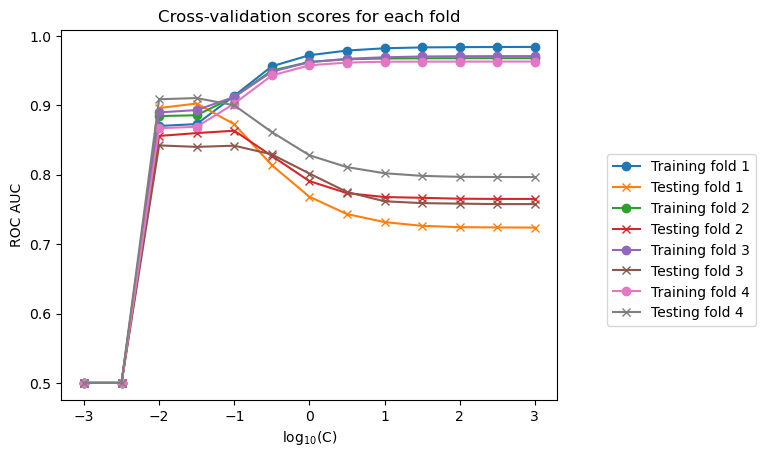

In [42]:
for this_fold in range(k_folds.n_splits):
    plt.plot(C_val_exponents, cv_train_roc_auc[this_fold], '-o',
             
             label='Training fold {}'.format(this_fold+1))
    plt.plot(C_val_exponents, cv_test_roc_auc[this_fold], '-x',
            
             label='Testing fold {}'.format(this_fold+1))
plt.ylabel('ROC AUC')
plt.xlabel('log$_{10}$(C)')
plt.legend(loc = [1.1, 0.2])
plt.title('Cross-validation scores for each fold')